**Tp3 - BERNAT Loan**

In [114]:
import matplotlib.pyplot as plt
import numpy as np

***Partie 1 : Classification***

In [115]:
def creationNuageDePoint(x, y, n, scale=1):
    """
    : param x : Coordonee en x du point de ref
    : param y : Coordonee en y du point de ref
    : param n : Nombre de point a generer
    : param scale : Distance max autorise
    : return : Une double liste des coordonnees x,y
    """
    multiplicateur = [-scale, scale]
    tableauCoordonee = [[x], [y]]
    for i in range(n):
        tirage = np.random.random(2)
        tableauCoordonee[0].append(tirage[0]* multiplicateur[np.random.randint(0, 2)]+x)
        tableauCoordonee[1].append(tirage[1]* multiplicateur[np.random.randint(0, 2)] +y)
    return np.array([tableauCoordonee[0],tableauCoordonee[1]])

In [116]:
def traceDeGroupe(g,param="ro"):
    '''
    :param g: groupe a afficher
    :param param: style d'affichage
    :return: void
    '''
    plt.plot(g[0],g[1],param)


In [117]:
def centre(g):
    '''
    :param g: groupe
    :return: le point centre
    '''
    return np.array([np.mean(g[0]), np.mean(g[1])])

In [118]:
def separateur(g1,g2):
    """renvoie le milieu du segment qui relie les centres de g1 et g2, et un vecteur directeur de la médiatrice"""
    c1 = centre(g1)
    c2 = centre(g2)
    m = 0.5*(c1+c2)
    c1x, c1y = c1
    c2x, c2y = c2
    return (m,(c1x-c2x,c1y-c2y))

def plot_separateur(m,w,scale=3):
    """à partir d'un point M et un vecteur directeur w, trace un segment de la droite correspondante
    (échelle/scale à ajuster selon la figure)
    """
    tw = (-w[1],w[0])
    plt.plot([m[0]+scale*tw[0],m[0]-scale*tw[0]],[m[1]+scale*tw[1],m[1]-scale*tw[1]],"y-")

In [119]:
def classifierPoint(p,m,w):
    '''
    :param p: point a classifier
    :param m: point median des barycentres des groupes
    :param w: vecteur du separateur
    :return: angle entre MP et w. Positif = g1, Negatif = g2
    '''
    mx, my = m
    px , py = p
    MP = (px-mx,py-my)
    return np.dot(MP,w)

In [120]:
def genererPointRandom(Xmin,Ymin,Xmax,Ymax):
    '''
    Generation d'un point 2D aleatoire compris dans les bornes passees en param
    '''
    x = Xmin + (np.random.random(1) * (Xmax-Xmin))
    y = Ymin + (np.random.random(1) * (Ymax-Ymin))
    return x[0], y[0]

In [121]:
def classifierListePoint(P,m,w):
    '''
    Permet de classifier une liste de point selon un separateur
    :param P: la liste de Point
    :param m: le point median du separateur
    :param w: le coefficient directeur du separateur
    :return: void
    '''
    for p in P:
        if classifierPoint(p,m,w) > 0:
            couleur = couleurG1[0]
        else :
            couleur = couleurG2[0]
        couleur = couleur + "X"
        plt.plot(p[0],p[1],couleur,markersize=15,alpha=0.5)

Après avoir définit toutes nos fonctions, nous allons pouvoir les tester. Dans un premier temps, une simple classification entre 2 groupes généré aléatoirement autour d'un point de base.

In [122]:
couleurG1 = "ro"
couleurG2 = "bo"

g2 = creationNuageDePoint(1,2,100,scale=0.5)
g1 = creationNuageDePoint(2,1,100,scale=0.5)
m, w = separateur(g1,g2)

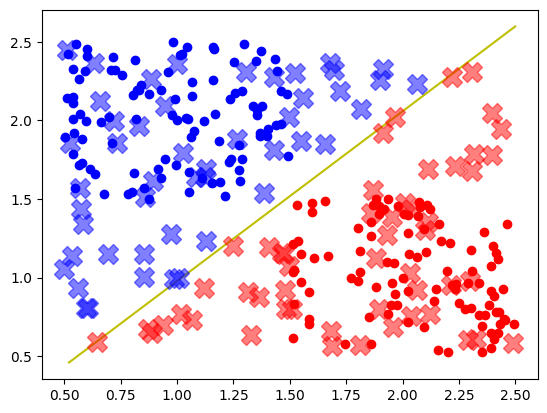

In [123]:
traceDeGroupe(g1,param=couleurG1)
traceDeGroupe(g2,param=couleurG2)
plot_separateur(m,w,scale=1)
points=[]
for i in range(100):
    points.append(genererPointRandom(0.5,0.5,2.5,2.5))
classifierListePoint(points,m,w)

Résultat : On constate aisément que notre séparateur fonctionne. On a bien une claire démarquation entre nos 2 groupes. Voyons ce qu'il en est pour des groupes un peu moins "séparés"

In [124]:
from sklearn.datasets import make_moons, make_circles
d = make_moons(noise=0.3, random_state=0)
xy, c = d

In [125]:
def traitementDoneeBonus(xy,c):
    g0c = [[],[]]
    g1c = [[],[]]
    for i in range(len(c)):
        if c[i] == 0:
            g0c[0].append(xy[i][0])
            g0c[1].append(xy[i][1])
        else :
            g1c[0].append(xy[i][0])
            g1c[1].append(xy[i][1])
    return np.array([g0c[0],g0c[1]]), np.array([g1c[0],g1c[1]])

In [126]:
g1 ,g2 = traitementDoneeBonus(xy,c)

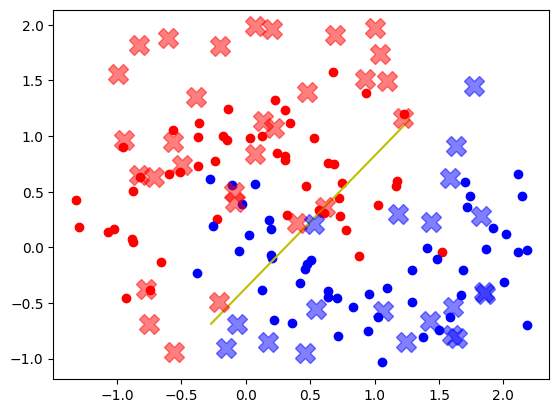

In [127]:
traceDeGroupe(g1,"ro")
traceDeGroupe(g2,"bo")
m,w = separateur(g1,g2)
plot_separateur(m,w,scale=1)
points=[]
for i in range(50):
    points.append(genererPointRandom(-1,-1,2,2))
classifierListePoint(points,m,w)

Resultat : On voit bien ici que faire du clustering en utilisant une affine comme separateur n'est pas adapte a ce style de donnee. Il nous faudrait un séparateur capable de mieux "épouser" la forme de nos groupes de données initiaux.

**PARTIE 2 : Iris**

In [128]:
d = np.genfromtxt('iris.txt', dtype=None,delimiter=',',names=True,encoding=None)

In [129]:
def associerData(data,carac1,carac2):
    '''
    Renvoie un dictionnaire de matrice numpy pour chaque classe
    :param data: une liste de couple de donnee
    :param carac: la carac que l'on veut etudier
    :return: un dictionnaire de matrice numpy pour chaque classe
    '''
    if carac1 == "sepal_l" :
        rang1=0
    elif carac1 == "sepal_w" :
        rang1=1
    elif carac1 == "petal_l" :
        rang1=2
    elif carac1 == "petal_w" :
        rang1=3
    else:
        print("error : carac1 inconnue")
        return None
    if carac2 == "sepal_l" :
        rang2=0
    elif carac2 == "sepal_w" :
        rang2=1
    elif carac2 == "petal_l" :
        rang2=2
    elif carac2 == "petal_w" :
        rang2=3
    else:
        print("error : carac2 inconnue")
        return None

    dicoGroupe = {}
    for couple in data:
        (sl,sw,pl,pw,c) = couple
        if c not in dicoGroupe:
            dicoGroupe[c] = [[],[]]
        dicoGroupe[c][0].append(couple[rang1])
        dicoGroupe[c][1].append(couple[rang2])
    for groupe in dicoGroupe:
        dicoGroupe[groupe] = np.array([dicoGroupe[groupe][0],dicoGroupe[groupe][1]])
    return dicoGroupe

def afficherCarac(dico, color=None):
    '''
    Affiche les carac par groupe
    :param dico: dictionnaire des caracs par groupe
    :param color: liste de couleur pour l'affichage
    :return: void
    '''
    if color is None:
        color = ["ro", "bo", "go"]
    indice=0
    for groupe in dico:
        traceDeGroupe(dico[groupe],color[indice])
        print(groupe, " en couleur ", color[indice])
        if indice+1==len(color):
            indice = 0
        else:
            indice+=1

Comparons un peu nos caractéristiques via nos nouvelles fonctions.

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


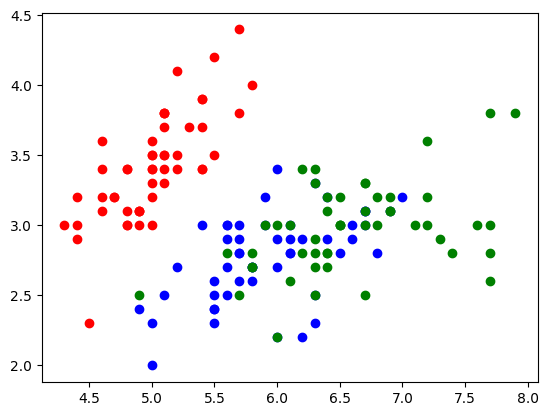

In [130]:
dicoData1 = associerData(d,"sepal_l","sepal_w")
afficherCarac(dicoData1)

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


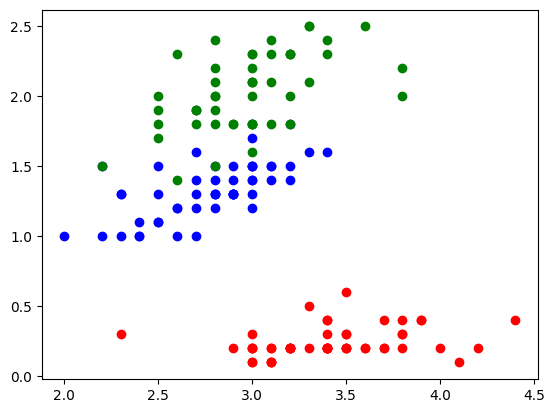

In [131]:
dicoData2 = associerData(d,"sepal_w","petal_w")
afficherCarac(dicoData2)

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


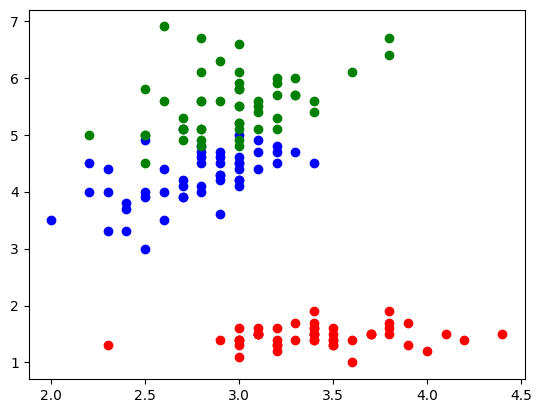

In [132]:
dicoData3 = associerData(d,"sepal_w","petal_l")
afficherCarac(dicoData3)

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


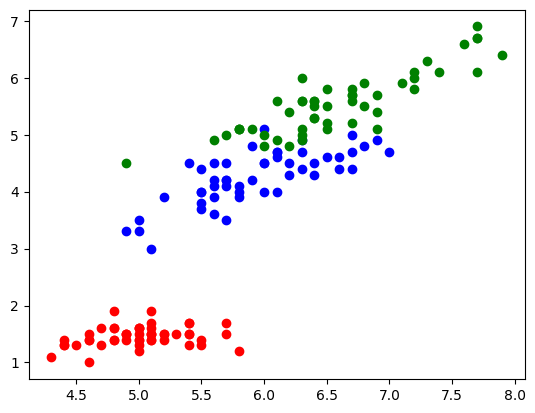

In [133]:
dicoData4 = associerData(d,"sepal_l","petal_l")
afficherCarac(dicoData4)

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


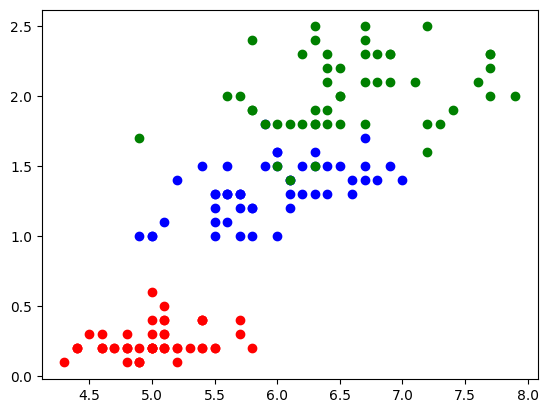

In [134]:
dicoData5 = associerData(d,"sepal_l","petal_w")
afficherCarac(dicoData5)

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


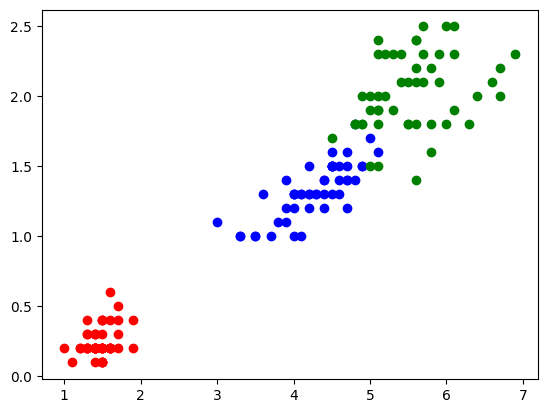

In [135]:
dicoData6 = associerData(d,"petal_l","petal_w")
afficherCarac(dicoData6)

Resultat : On voit bien que petal-l petal-w est le meilleur duo de caractéristiques à étudier car les données sont mieux séparées. Sepal_w / petal_w et sepal_l / petal_w restent utilisablent

Essayons maintenant de classifier via la méthode de calcul de séparateur de la partie 1

In [136]:
def classifierIris(P,m12,w12,m13,w13,m23,w23,couleur=["r","b","g"]):
    '''
    Fonction speciale our le traitement de l'iris. N'est pas utilisable en dehors de ce cas particulier a 3 groupes
    '''
    for p in P:
        if classifierPoint(p,m13,w13) > 0:
            if classifierPoint(p,m12, w12) > 0:
                color = couleur[0]
            else:
                color = couleur[1]
        else :
            if classifierPoint(p, m23,w23) < 0:
                color = couleur[2]
            else:
                color = couleur[1]
        color += "X"
        plt.plot(p[0],p[1],color,markersize=15,alpha=0.5)

def testClassificationSeparateur(dico,fctSeparateur=separateur,points=None,Xmin=0,Ymin=-3,Xmax=7,Ymax=5):
    g1 = dico['Iris-setosa']
    g2 = dico['Iris-versicolor']
    g3 = dico['Iris-virginica']
    m12,w12 = fctSeparateur(g1,g2)
    m13,w13 = fctSeparateur(g1,g3)
    m23,w23 = fctSeparateur(g2,g3)
    afficherCarac(dico)
    plot_separateur(m12,w12,scale=1)
    plot_separateur(m13,w13,scale=1)
    plot_separateur(m23,w23,scale=1)
    if points is None:
        points=[]
        for i in range(100):
            points.append(genererPointRandom(Xmin,Ymin,Xmax,Ymax))
    classifierIris(points,m12,w12,m13,w13,m23,w23)

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


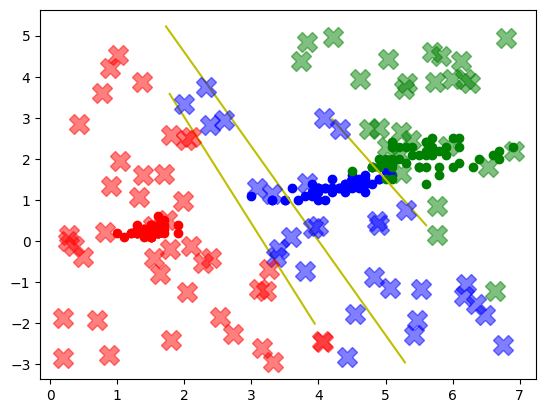

In [137]:
testClassificationSeparateur(dicoData6,separateur)

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


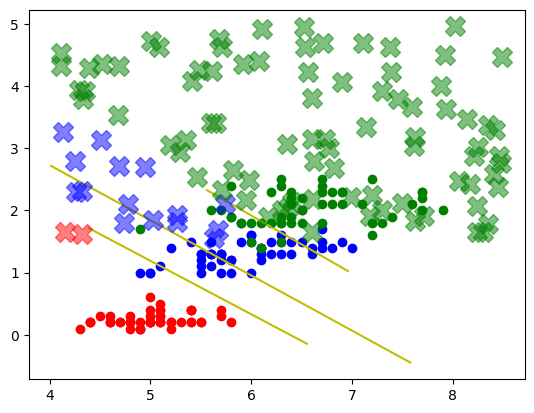

In [138]:
testClassificationSeparateur(dicoData5,fctSeparateur=separateur,Xmin=4,Ymin=1.5,Xmax=8.5,Ymax=5)

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


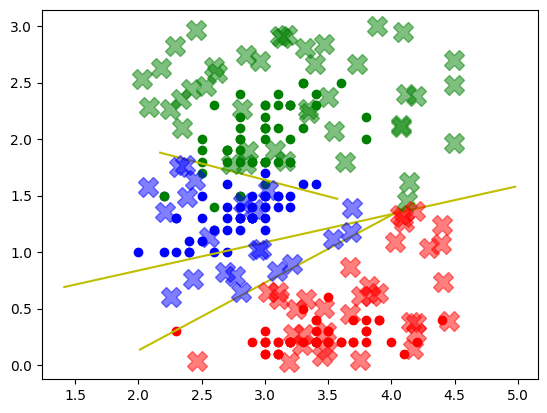

In [139]:
testClassificationSeparateur(dicoData2,fctSeparateur=separateur,Xmin=2,Ymin=0,Xmax=4.5,Ymax=3)

Résultat : Nous avons des résultats satisfaisants mais nous pouvons encore améliorer ça en changeant les modèles de séparateurs

Nous allons maintenant essayer de tester avec nos propres modèles. J'ai essayé d'incliner plus ou moins les séparateur pour essayer d'épouser au mieux la délimitation des 2 dernières familles. TEST VIA petal_l petal_w. Pour tester autre chose, changer ke dico et adapter la fenetre de generation aleatoire

In [140]:
def baseSeparateur(g1,g2):
    c1 = centre(g1)
    c2 = centre(g2)
    m = 0.5*(c1+c2)
    c1x, c1y = c1
    c2x, c2y = c2
    return m, c1x,c1y,c2x,c2y

In [141]:
def separateurModele1(g1,g2):
    m, c1x,c1y,c2x,c2y = baseSeparateur(g1,g2)
    return (m,(c1x-c2x,c1y-2*c2y))

def separateurModele2(g1,g2):
    m, c1x,c1y,c2x,c2y = baseSeparateur(g1,g2)
    return (m,(c1x-c2x,2*c1y-c2y))

def separateurModele3(g1,g2):
    m, c1x,c1y,c2x,c2y = baseSeparateur(g1,g2)
    return (m,(c1x-2*c2x,c1y-c2y))

def separateurModele4(g1,g2):
    m, c1x,c1y,c2x,c2y = baseSeparateur(g1,g2)
    return (m,(2*c1x-c2x,2*c1y-c2y))

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


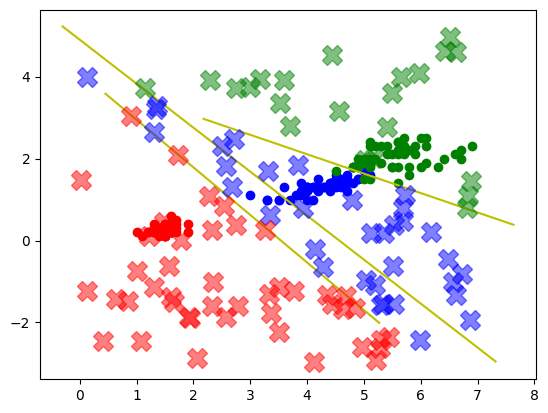

In [142]:
testClassificationSeparateur(dicoData6,separateurModele1)

Resultat : Je le trouve légèrement plus efficace que le modèle 0 (initial). Même si la classification des points éloignés des groupes sont moins intérréssantes.

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


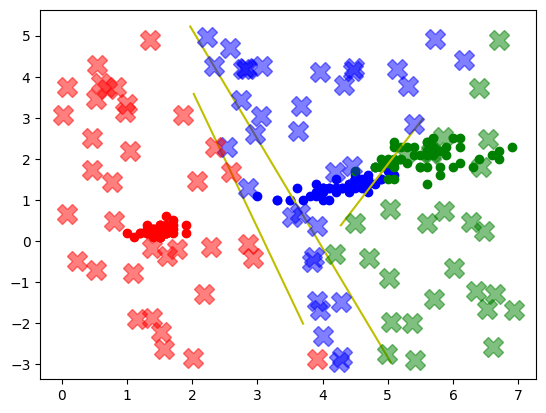

In [143]:
testClassificationSeparateur(dicoData6,separateurModele2)

Résultat : Moins intérréssant que le modèle 1 et 0. L'inclinaison du séparateur ne convient pas avec cette donnée

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


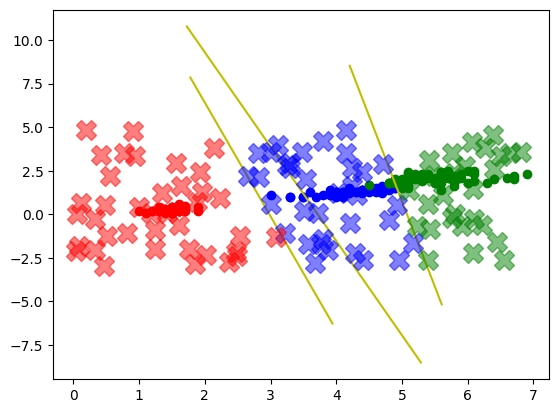

In [144]:
testClassificationSeparateur(dicoData6,separateurModele3)

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


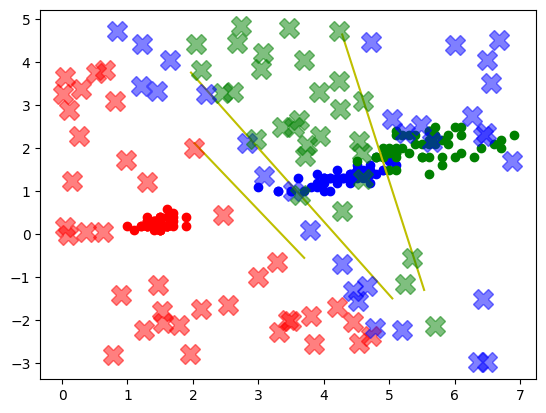

In [145]:
testClassificationSeparateur(dicoData6,separateurModele4)

Résultat : Les modèles 3 et 4 ne conviennent pas.

Le meilleur modèle serait pour moi le n°1


On va maintenant tester de classifer les autres fleurs en partant d'une base de donnée de 5 premières fleurs de chaque classe.

In [146]:
def donnesEnPoint(donnees,carac1,carac2):
    if carac1 == "sepal_l" :
        rang1=0
    elif carac1 == "sepal_w" :
        rang1=1
    elif carac1 == "petal_l" :
        rang1=2
    elif carac1 == "petal_w" :
        rang1=3
    else:
        print("error : carac1 inconnue")
        return None
    if carac2 == "sepal_l" :
        rang2=0
    elif carac2 == "sepal_w" :
        rang2=1
    elif carac2 == "petal_l" :
        rang2=2
    elif carac2 == "petal_w" :
        rang2=3
    else:
        print("error : carac2 inconnue")
        return None
    liste=[]
    for couple in donnees:
        liste.append((couple[rang1],couple[rang2]))
    return liste

def classerFleurs(echantillon,carac1,carac2, donnees):
    dico = associerData(echantillon,carac1,carac2)
    listePoints = donnesEnPoint(donnees,carac1,carac2)
    testClassificationSeparateur(dico,fctSeparateur=separateurModele1,points=listePoints)


In [147]:
def genererEchantillon(data, nbParClasse):
    '''
    Génére un échantillon à partir de données et du nb par classe à avoir
    :param data: liste de donnes
    :param nbParClasse: nb de fleurs par classe à prendre pour l'échantillon de base
    :return: liste de donnee
    '''
    echantillon=[]
    nbActuel=0
    nomClasse=""
    for i in range(len(data)):
        if nomClasse != data[i]["classe"]:
            nomClasse = data[i]["classe"]
            nbActuel=0
        if nbActuel < nbParClasse:
            echantillon.append(data[i])
            nbActuel+=1
    return echantillon

Iris-setosa  en couleur  ro
Iris-versicolor  en couleur  bo
Iris-virginica  en couleur  go


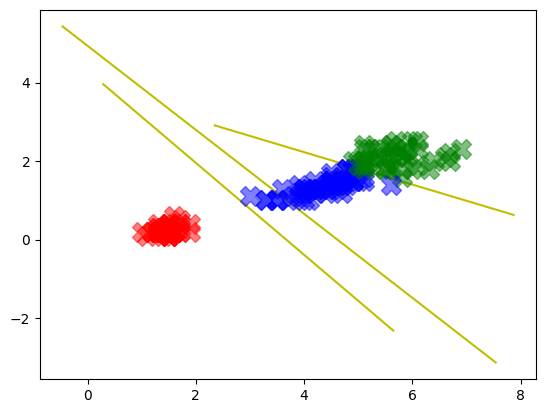

In [148]:
echantillon = genererEchantillon(d,5)
classerFleurs(echantillon,"petal_l","petal_w",d)

RESULTAT : Test fait avec Petal_l petal_w et le modèle 1 --> Reconsitution quasiment parfaite.